In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
!pip install openpyxl


In [2]:
data = pd.read_excel('D:\Big Data\DATA_RUMAH.xlsx')

In [3]:
data

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


In [4]:
data.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [5]:
data['HargaJuta'] = data['HARGA']//1000000

<Axes: xlabel='GRS', ylabel='HargaJuta'>

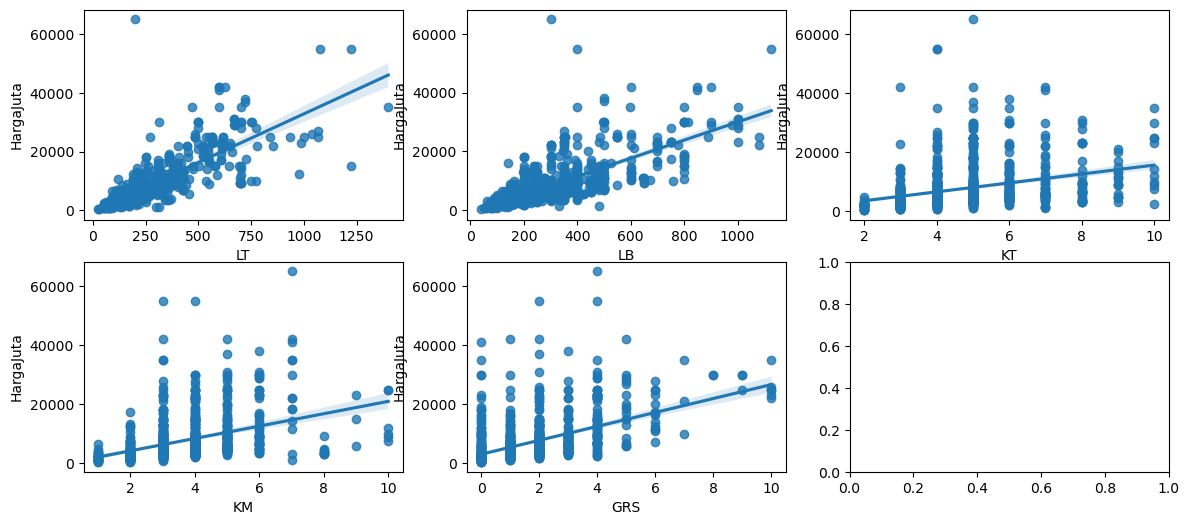

In [6]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(14, 6), dpi=100)
sns.regplot(data=data, x="LT", y="HargaJuta", ax=axs[0][0])
sns.regplot(data=data, x="LB", y="HargaJuta", ax=axs[0][1])
sns.regplot(data=data, x="KT", y="HargaJuta", ax=axs[0][2])
sns.regplot(data=data, x="KM", y="HargaJuta", ax=axs[1][0])
sns.regplot(data=data, x="GRS", y="HargaJuta", ax=axs[1][1])

In [7]:
data_without_no_and_price = data.drop(columns=['NO', 'NAMA RUMAH', 'HARGA'], inplace=False)
data_without_no_and_price.describe()

,LB,LT,KT,KM,GRS,HargaJuta
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,276.539604,237.432673,4.668317,3.607921,1.920792,7628.982178
std,177.864557,179.957604,1.572776,1.420066,1.510998,7340.945285
min,40.000000,25.000000,2.000000,1.000000,0.000000,430.000000
25%,150.000000,130.000000,4.000000,3.000000,1.000000,3262.500000
50%,216.500000,165.000000,4.000000,3.000000,2.000000,5000.000000
75%,350.000000,290.000000,5.000000,4.000000,2.000000,9000.000000
max,1126.000000,1400.000000,10.000000,10.000000,10.000000,65000.000000


In [8]:
min_price = data_without_no_and_price['HargaJuta'].min()
max_price = data_without_no_and_price['HargaJuta'].max()
q = data_without_no_and_price['HargaJuta'].quantile([.25, .5, .75])
q

0.25    3262.5
0.50    5000.0
0.75    9000.0
Name: HargaJuta, dtype: float64

In [9]:
low_price_house = data_without_no_and_price.loc[data_without_no_and_price['HargaJuta'] <= q[0.25]]
mid_price_house = data_without_no_and_price.loc[(data_without_no_and_price['HargaJuta'] > q[0.25]) & (data_without_no_and_price['HargaJuta'] <= q[0.50])]
high_price_house = data_without_no_and_price.loc[data_without_no_and_price['HargaJuta'] > q[0.50]]

In [32]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
 8   HargaJuta   1010 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 71.1+ KB


In [34]:
data_without_no_and_price = data.drop(columns=['NO', 'NAMA RUMAH', 'HARGA'], inplace=False)
data_without_no_and_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LB         1010 non-null   int64
 1   LT         1010 non-null   int64
 2   KT         1010 non-null   int64
 3   KM         1010 non-null   int64
 4   GRS        1010 non-null   int64
 5   HargaJuta  1010 non-null   int64
dtypes: int64(6)
memory usage: 47.5 KB


In [35]:
correlations = data_without_no_and_price.corr()

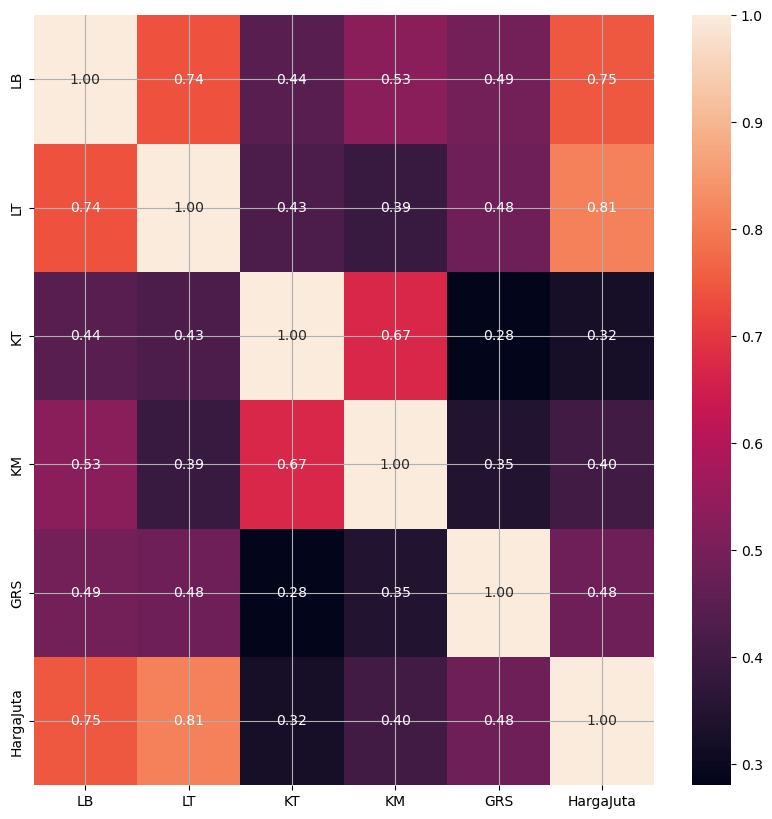

In [37]:
plt.figure(figsize=(10, 10))

sns.heatmap(correlations, annot=True, fmt='.2f')

plt.grid()
plt.show()

([<matplotlib.patches.Wedge at 0x1a17e6575e0>,
 [Text(0.7766068309123683, 0.7790262063501128, 'Harga Rendah'),
  Text(-0.8189838062989407, 0.7343470058630996, 'Harga Menengah'),
  Text(0.05813885738749492, -1.0984625042584188, 'Harga Tinggi')],
 [Text(0.4236037259522008, 0.4249233852818796, '25%'),
  Text(-0.44671843979942216, 0.40055291228896345, '27%'),
  Text(0.03171210402954268, -0.5991613659591375, '48%')])

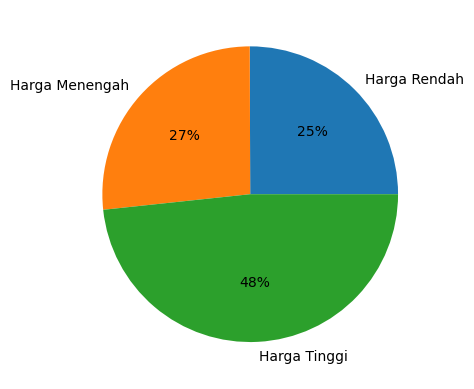

In [10]:
plt.pie([len(low_price_house), len(mid_price_house), len(high_price_house)], labels = ['Harga Rendah', 'Harga Menengah', 'Harga Tinggi'], autopct='%.0f%%')

In [11]:
def group_by_price_category(price):
    if(price <= q[0.25]):
        return 'Harga Rendah'
    elif(price > q[0.25] and price  <= q[0.50]):
        return 'Harga Menegah'
    elif(price > q[0.50]):
        return 'Harga Tinggi'
    else:
        return '-'

data_with_price_grouping = data.copy()
data_with_price_grouping['KELAS HARGA'] = data_with_price_grouping['HargaJuta'].apply(group_by_price_category)
data_with_price_grouping.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS,HargaJuta,KELAS HARGA
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0,3800,Harga Menegah
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2,4600,Harga Menegah
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4,3000,Harga Rendah
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0,430,Harga Rendah
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3,9000,Harga Tinggi


<Axes: xlabel='HargaJuta', ylabel='GRS'>

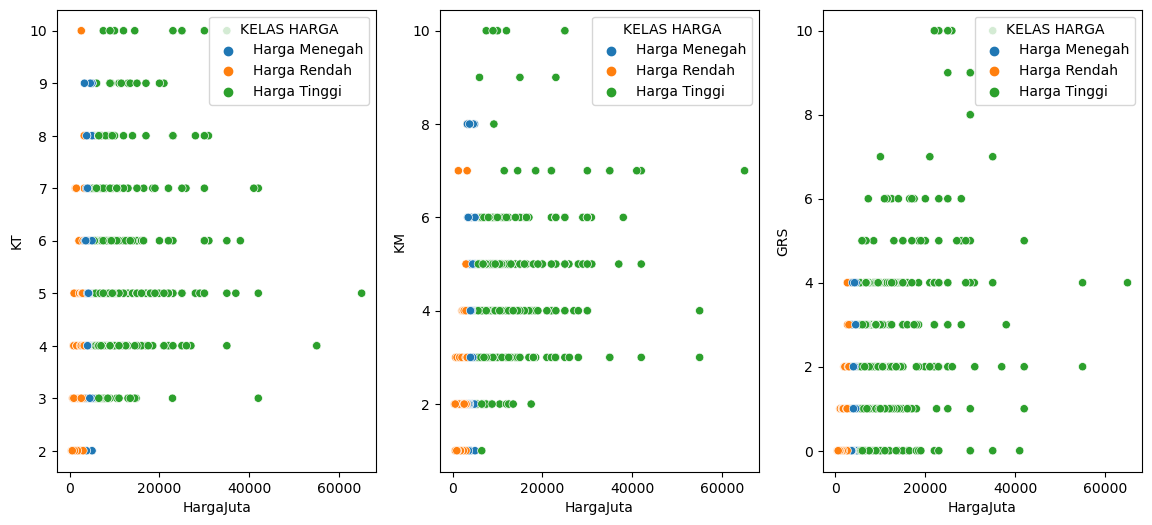

In [12]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(14, 6), dpi=100)
sns.scatterplot(data=data_with_price_grouping, x="HargaJuta", y="KT", hue="KELAS HARGA", ax=axs[0])
sns.scatterplot(data=data_with_price_grouping, x="HargaJuta", y="KM", hue="KELAS HARGA", ax=axs[1])
sns.scatterplot(data=data_with_price_grouping, x="HargaJuta", y="GRS", hue="KELAS HARGA", ax=axs[2])

In [13]:
price_kt = data[['HargaJuta', 'KT']]
price_km = data[['HargaJuta', 'KM']]
price_grs = data[['HargaJuta', 'GRS']]

In [14]:
pearson_corr_price_vs_kt = price_kt.corr(method='pearson')['HargaJuta']['KT']
pearson_corr_price_vs_km = price_km.corr(method='pearson')['HargaJuta']['KM']
pearson_corr_price_vs_grs = price_grs.corr(method='pearson')['HargaJuta']['GRS']

# Kendall method
kendall_corr_price_vs_kt = price_kt.corr(method='kendall')['HargaJuta']['KT']
kendall_corr_price_vs_km = price_km.corr(method='kendall')['HargaJuta']['KM']
kendall_corr_price_vs_grs = price_grs.corr(method='kendall')['HargaJuta']['GRS']

# Spearman method
spearman_corr_price_vs_kt = price_kt.corr(method='spearman')['HargaJuta']['KT']
spearman_corr_price_vs_km = price_km.corr(method='spearman')['HargaJuta']['KM']
spearman_corr_price_vs_grs = price_grs.corr(method='spearman')['HargaJuta']['GRS']

correlation_comparasion = pd.DataFrame({
    'item': ['HARGA vs KT', 'HARGA vs KM', 'HARGA vs GRS'],
    'pearson': [pearson_corr_price_vs_kt, pearson_corr_price_vs_km, pearson_corr_price_vs_grs],
    'kendall': [kendall_corr_price_vs_kt, kendall_corr_price_vs_km, kendall_corr_price_vs_grs],
    'spearman': [spearman_corr_price_vs_kt, spearman_corr_price_vs_km, spearman_corr_price_vs_grs],
})
correlation_comparasion

,item,pearson,kendall,spearman
0,HARGA vs KT,0.323320,0.362457,0.477077
1,HARGA vs KM,0.404770,0.424793,0.547344
2,HARGA vs GRS,0.484892,0.381156,0.476176


In [15]:
price_lt = data[['HargaJuta', 'LT']]
price_lb = data[['HargaJuta', 'LB']]

In [16]:
pearson_corr_price_vs_lt = price_lt.corr(method='pearson')['HargaJuta']['LT']
pearson_corr_price_vs_lb = price_lb.corr(method='pearson')['HargaJuta']['LB']

# Kendall method
kendall_corr_price_vs_lt = price_lt.corr(method='kendall')['HargaJuta']['LT']
kendall_corr_price_vs_lb = price_lb.corr(method='kendall')['HargaJuta']['LB']

# Spearman method
spearman_corr_price_vs_lt = price_kt.corr(method='spearman')['HargaJuta']['KT']
spearman_corr_price_vs_lb = price_km.corr(method='spearman')['HargaJuta']['KM']

correlation_comparasion = pd.DataFrame({
    'item': ['HARGA vs LT', 'HARGA vs LB'],
    'pearson': [pearson_corr_price_vs_lt, pearson_corr_price_vs_lb],
    'kendall': [kendall_corr_price_vs_lt, kendall_corr_price_vs_lb],
    'spearman': [spearman_corr_price_vs_lt, spearman_corr_price_vs_lb],
})
correlation_comparasion

,item,pearson,kendall,spearman
0,HARGA vs LT,0.809617,0.664847,0.477077
1,HARGA vs LB,0.747083,0.631357,0.547344


In [17]:
data_array = data.to_numpy() # convert ke array
data_array


array([[1, 'Rumah Murah Hook Tebet Timur, Tebet, Jakarta Selatan',
        3800000000, ..., 3, 0, 3800],
       [2, 'Rumah Modern di Tebet dekat Stasiun, Tebet, Jakarta Selatan',
        4600000000, ..., 3, 2, 4600],
       [3,
        'Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, Tebet, Jakarta Selatan',
        3000000000, ..., 4, 4, 3000],
       ...,
       [1008, 'Di Kebun Baru Rumah Terawat, Area Strategis', 4000000000,
        ..., 4, 1, 4000],
       [1009,
        'Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebet Jakarta Selatan',
        19000000000, ..., 4, 0, 19000],
       [1010, 'Dijual Rumah Kokoh Di Gudang Peluru', 10500000000, ..., 4,
        2, 10500]], dtype=object)

In [18]:
data_x = data_array[:,[3,4,5,6,7]]

data_y = data_array[:,2]

data_x = data_x.reshape(1010, 5)

In [19]:
data_x

array([[220, 220, 3, 3, 0],
       [180, 137, 4, 3, 2],
       [267, 250, 4, 4, 4],
       ...,
       [139, 230, 4, 4, 1],
       [360, 606, 7, 4, 0],
       [420, 430, 7, 4, 2]], dtype=object)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression(positive=True)  # buat model

In [23]:
model.fit(x_train, y_train)  # pelatihan

LinearRegression(positive=True)

In [24]:
print(model.coef_)     # theta 1
print(model.intercept_)  # theta 0

[1.35286660e+07 2.12071413e+07 0.00000000e+00 2.50974923e+07
 3.42586012e+08]
-1832250625.152461


In [25]:
model.score(x_train, y_train)

0.6666237408620184

In [26]:
model.score(x_val, y_val)

0.7524275985761681

In [27]:
model.score(x_test, y_test) # terbatas

0.7673030450666876

In [28]:
rumahbaru = [[220, 220, 3, 3, 0]]

prediksi_baru = model.predict(rumahbaru)
prediksi_baru  

array([5.88491945e+09])

In [29]:
def formatrupiah(uang):
    y = str(uang)
    if len(y) <= 3 :
        return 'Rp ' + y     
    else :
        p = y[-3:]
        q = y[:-3]
        return   formatrupiah(q) + '.' + p

In [30]:
hargarumahprediksi = int(prediksi_baru[0])
print("Harga Rumah adalah ", formatrupiah(hargarumahprediksi))

Harga Rumah adalah  Rp 5.884.919.445


In [31]:
# Preprocessing
data['HargaJuta'] = data['HARGA'] // 1000000

# Split the dataset into features (X) and target variable (y)
X = data.drop(['NO', 'NAMA RUMAH', 'HARGA', 'HargaJuta', 'LB'], axis=1)
y = data['LB']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 10993.40127965853
R^2 Score: 0.6052732241244068
